In [ ]:
%load_ext autoreload
%autoreload 2
import sys
import gc

from multiprocessing import cpu_count, Pool
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.utils.data as data_utils

from tqdm import tqdm

sys.path.append('../')
from wiki.utils import clock
from wiki import rnn, rnn_predict, newphet, val
%matplotlib inline

In [24]:
torch.manual_seed(1)
torch.cuda.set_device(0)

In [25]:
batch_size = 512
pred_len = 60

In [26]:
base_dir = '../data/'
train_df = pd.read_csv(base_dir+'train_1.csv').fillna(0)

In [1]:
X = train_df.drop('Page', axis=1).values
X, scaler = rnn.scale_values(X)

NameError: name 'train_df' is not defined

In [6]:
trainloader = data_utils.DataLoader(
    data_utils.TensorDataset(
        torch.from_numpy(X[:,:-2*pred_len,:]).float(),
        torch.from_numpy(X[:,-2*pred_len:-pred_len,:]).float()
    ),
    batch_size=batch_size, shuffle=False
)

In [7]:
valloader = data_utils.DataLoader(
    data_utils.TensorDataset(
        torch.from_numpy(X[:,:-pred_len,:]).float(),
        torch.from_numpy(X[:,-pred_len:,:]).float()
    ),
    batch_size=batch_size, shuffle=False
)

Its crucial that the `testloader` is not shuffled, as we'll use the page names directly from the train csv to index them later.

In [8]:
testloader = data_utils.DataLoader(
    data_utils.TensorDataset(
        torch.from_numpy(X[:,:,:]).float(),
        torch.zeros(X.shape[0])
    ),
    batch_size=batch_size, shuffle=False
)

In [9]:
loss_func = nn.L1Loss()
model = rnn.RNN(loss_func=loss_func).cuda()

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
save_best_path = base_dir+'rnn_v2_lr1.mdl'
with clock():
    model.fit(trainloader, valloader, optimizer=optimizer, num_epochs=20, save_best_path=save_best_path)


EPOCH 1
Running average loss: 0.380938
VALIDATION LOSS: 0.456770
Elapsed time 161.36574244499207 seconds

EPOCH 2
Running average loss: 0.387845
VALIDATION LOSS: 0.499010
Elapsed time 161.3883695602417 seconds

EPOCH 3
Running average loss: 0.372888
VALIDATION LOSS: 0.459744
Elapsed time 162.1795949935913 seconds

EPOCH 4
Running average loss: 0.363239
VALIDATION LOSS: 0.449002
Elapsed time 162.0177822113037 seconds

EPOCH 5
Running average loss: 0.353778
VALIDATION LOSS: 0.443414
Elapsed time 162.78928780555725 seconds

EPOCH 7
Running average loss: 0.352572
VALIDATION LOSS: 0.443005
Elapsed time 162.35685443878174 seconds

EPOCH 8
Running average loss: 0.352043
VALIDATION LOSS: 0.436838
Elapsed time 162.50207376480103 seconds

EPOCH 9
Running average loss: 0.349686
VALIDATION LOSS: 0.437846
Elapsed time 162.65406918525696 seconds

EPOCH 10
Running average loss: 0.342699
VALIDATION LOSS: 0.440097
Elapsed time 163.68144512176514 seconds

EPOCH 11
Running average loss: 0.340099
VALIDAT

In [13]:
save_best_path = base_dir+'rnn_v2_lr1.mdl'
model = torch.load(save_best_path).cuda()

In [15]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
save_best_path = base_dir+'rnn_v2_lr2.mdl'
with clock():
    model.fit(trainloader, valloader, optimizer=optimizer, num_epochs=10, save_best_path=save_best_path)


EPOCH 1
Running average loss: 0.318066
VALIDATION LOSS: 0.419108
Elapsed time 163.71369981765747 seconds

EPOCH 2
Running average loss: 0.315877
VALIDATION LOSS: 0.418079
Elapsed time 165.5453450679779 seconds

EPOCH 3
Running average loss: 0.316517
VALIDATION LOSS: 0.414079
Elapsed time 164.26730871200562 seconds

EPOCH 4
Running average loss: 0.312620
VALIDATION LOSS: 0.412958
Elapsed time 164.86634159088135 seconds

EPOCH 5
Running average loss: 0.312303
VALIDATION LOSS: 0.412623
Elapsed time 163.28610181808472 seconds

EPOCH 6
Running average loss: 0.311784
VALIDATION LOSS: 0.412160
Elapsed time 162.84262919425964 seconds

EPOCH 7
Running average loss: 0.310460
VALIDATION LOSS: 0.411863
Elapsed time 163.71142554283142 seconds

EPOCH 8
Running average loss: 0.312920
VALIDATION LOSS: 0.410998
Elapsed time 164.06922149658203 seconds

EPOCH 9
Running average loss: 0.317150
VALIDATION LOSS: 0.411153
Elapsed time 163.56079769134521 seconds

EPOCH 10
Elapsed time 60.60630416870117 second

KeyboardInterrupt: 

In [32]:
save_best_path = base_dir+'rnn_v2_lr2.mdl'
model = torch.load(save_best_path).cuda()

In [17]:
outputs, targets, sequences = model.predict(valloader)

In [63]:
del outputs, targets, sequences
gc.collect()

264

In [40]:
pages_df_template = rnn_predict.get_pages_df_template(base_dir)
dates = rnn_predict.get_dates(base_dir)

In [59]:
with clock():
    pred_df = rnn_predict.create_pred_dfs(dates, outputs, targets, sequences, scaler)

[autoreload of wiki.rnn_predict failed: Traceback (most recent call last):
  File "/home/ubuntu/miniconda3/envs/basev1/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/home/ubuntu/miniconda3/envs/basev1/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 369, in superreload
    module = reload(module)
  File "/home/ubuntu/miniconda3/envs/basev1/lib/python3.6/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/ubuntu/miniconda3/envs/basev1/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 608, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 205, in 

Beginning map
Elapsed time 267.9644477367401 seconds


In [71]:
for i, df in tqdm(enumerate(pred_df)):
    directory = '../data/ali_pred_dfs/'
    df.to_feather(directory+'/rnn_v2_page_'+str(i)+'.f')

145063it [02:15, 1068.81it/s]


In [ ]:
smapes = []
for i in tqdm(range(145063)):
    directory = '../data/ali_pred_dfs/'
    df = pd.read_feather(directory+'/rnn_v2_page_'+str(i)+'.f')
    smapes.append(val.smape_df(df[df.train == 0], 'y', 'yhat'))

 88%|████████▊ | 128069/145063 [12:54<01:53, 149.72it/s]

In [ ]:
smapes_capped = []
for i in tqdm(range(145063)):
    directory = '../data/ali_pred_dfs/'
    df = pd.read_feather(directory+'/rnn_v2_page_'+str(i)+'.f')
    df = df[df.train == 0]
    y_true = df['y']
    y_pred = df['y'].clip(lower=0).round().astype(int)
    smapes_capped.append(val.smape(df[df.train == 0], 'y', 'yhat'))

In [ ]:
pd.DataFrame(smapes, columns=['smapes']).to_feather('../data/rnn_v2_smapes.f')
pd.DataFrame(smapes_capped, columns=['smapes']).to_feather('../data/rnn_v2_capped_smapes.f')

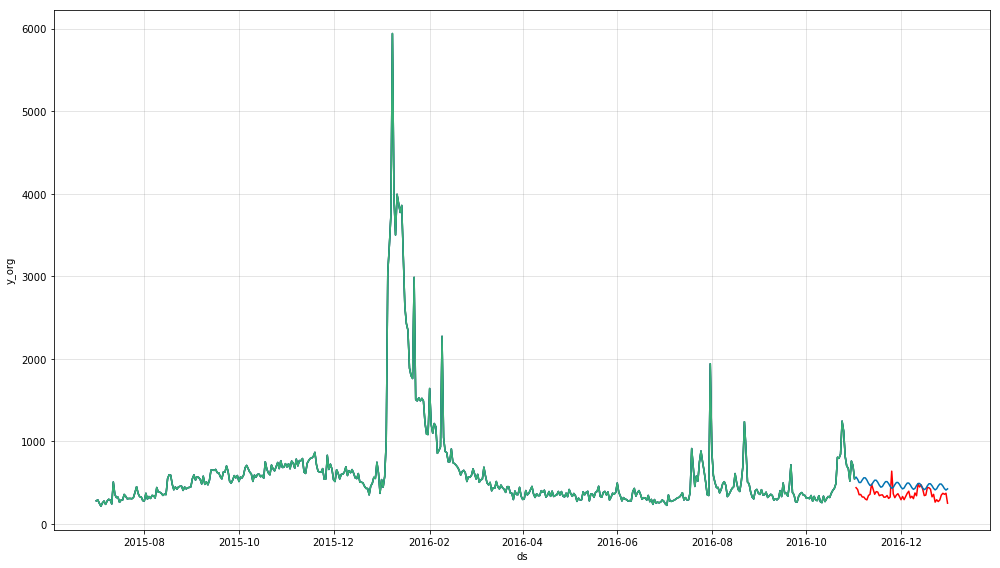

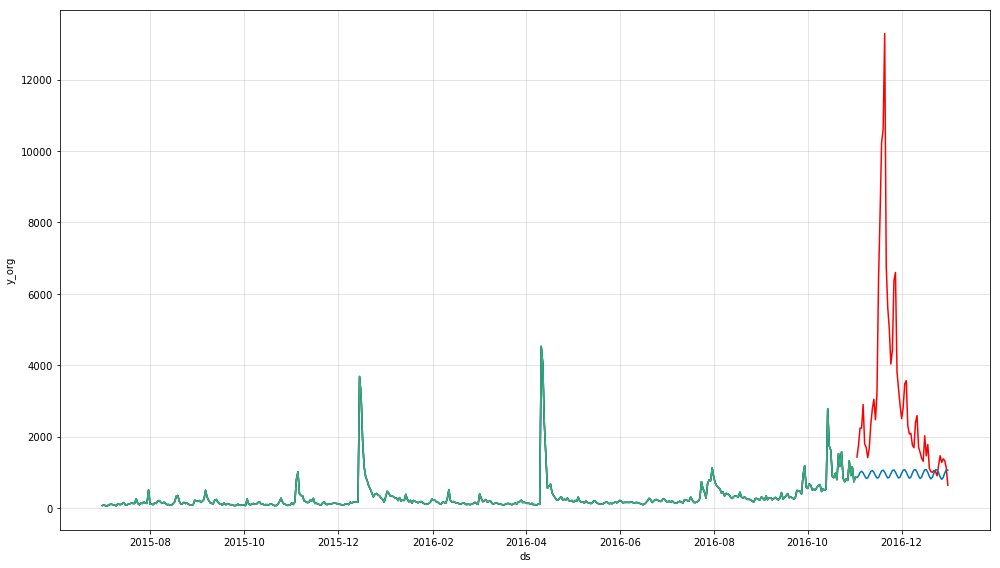

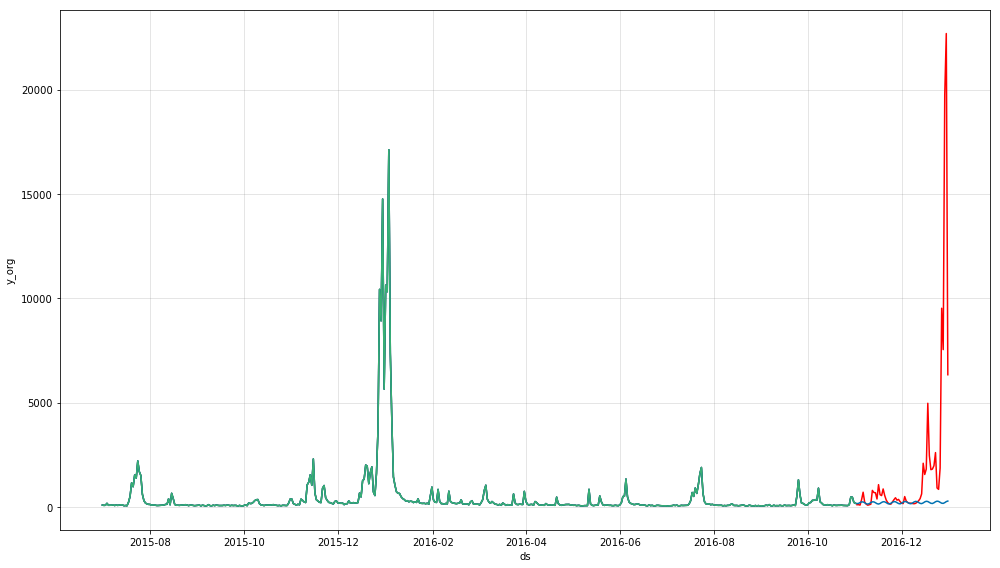

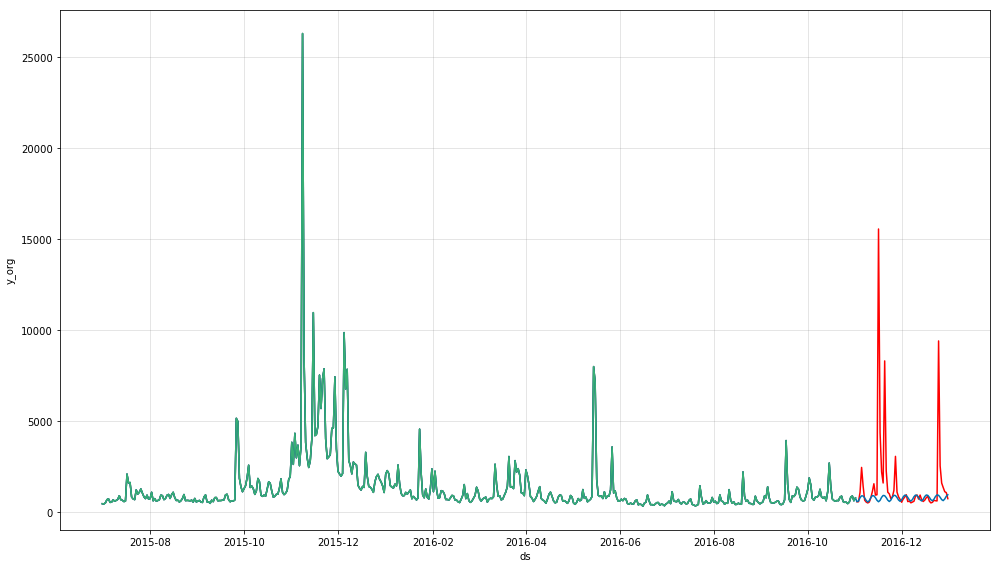

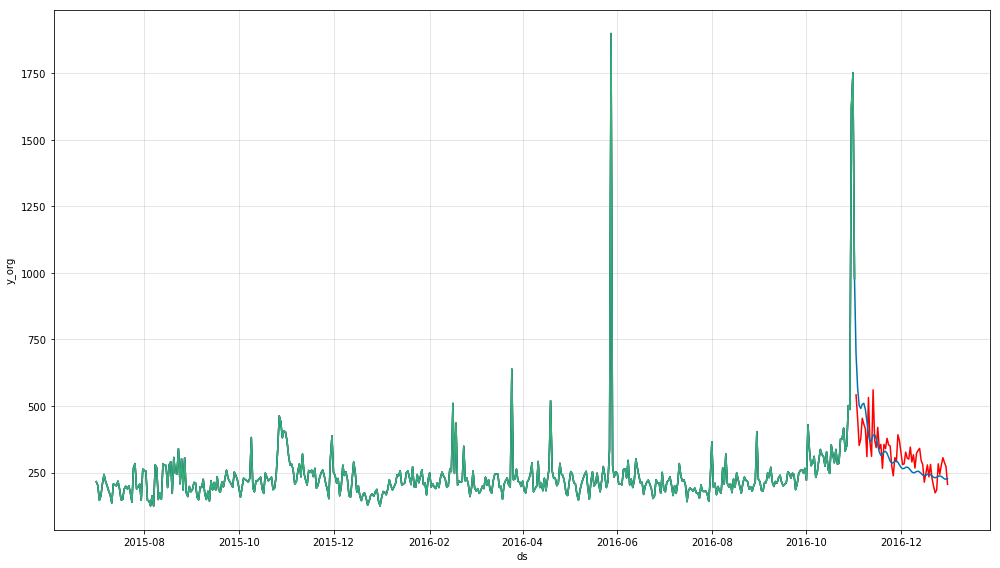

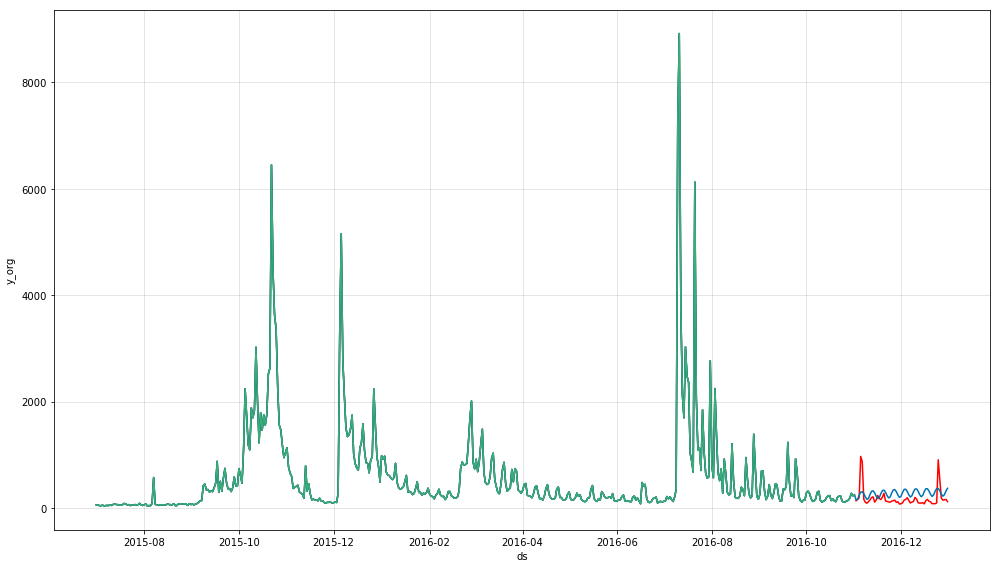

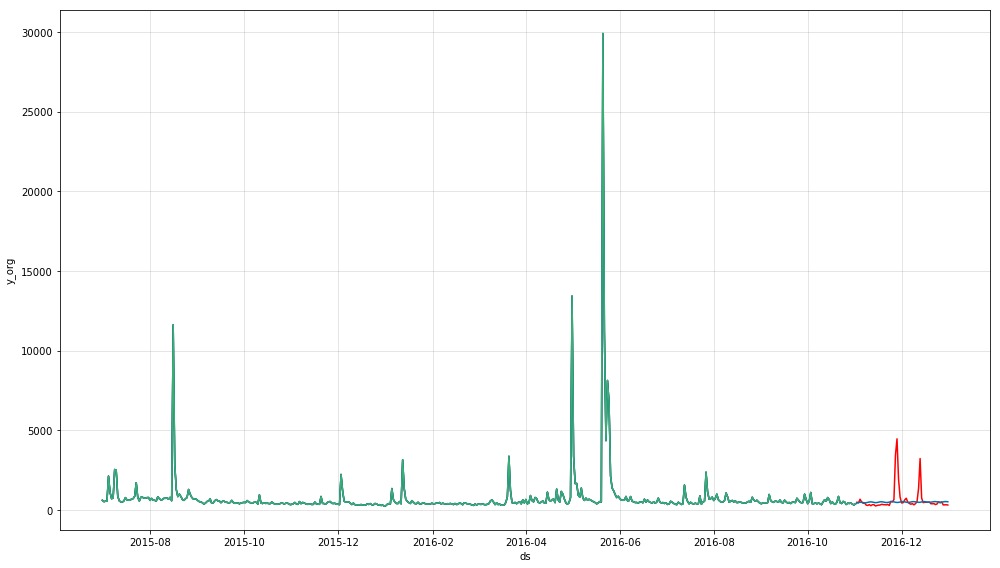

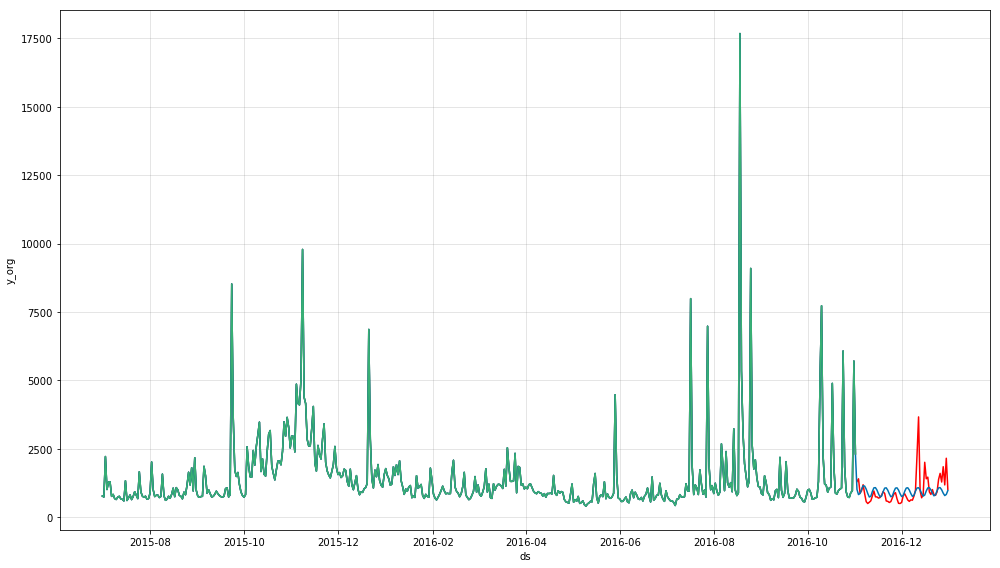

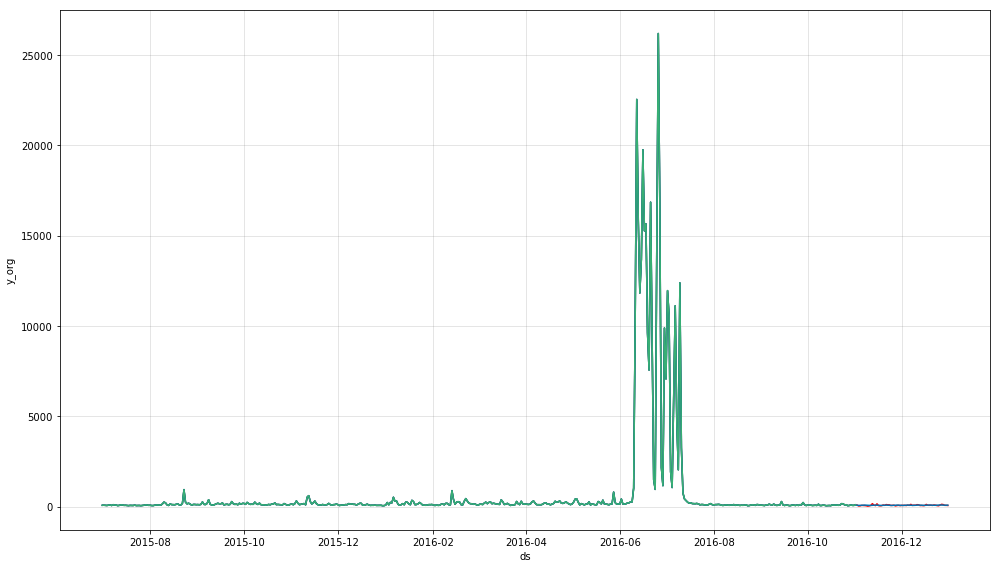

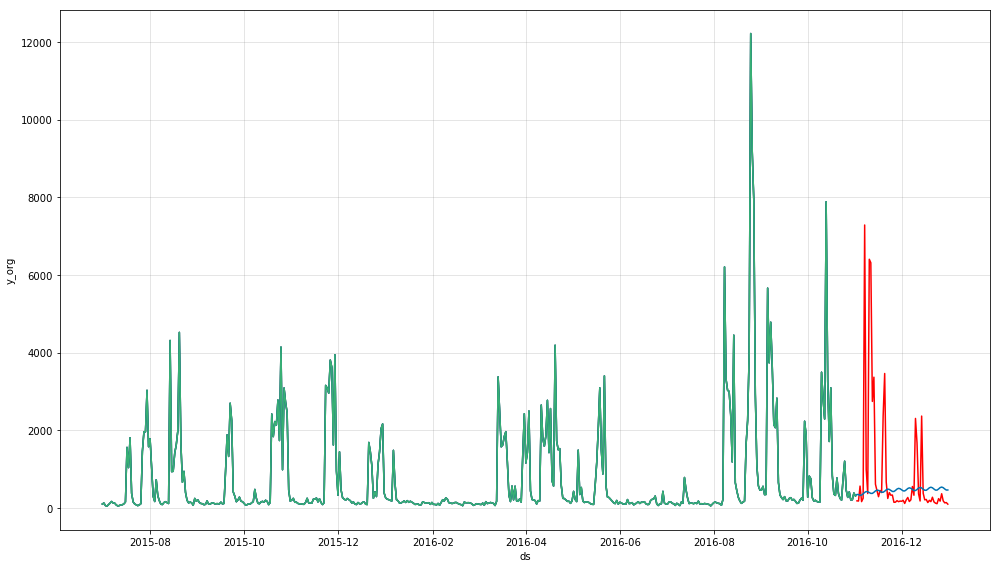

In [72]:
for x in range(140010,140020):
    newphet.prophet_plot(pred_df[x], uncertainty=False)

In [60]:
with clock():
    create_pages_df(pages_df_template, pred_dfs, col_name='rnn_v2')

Elapsed time 4.291534423828125e-06 seconds


NameError: name 'create_pages_df' is not defined